# **STUDENT PROFILE ANALYSIS**
### **KMEANS,DBSCAN, HIERARCHICAL CLUSTERING**

# **1. HIGH-LEVEL OUTLINE**
* [**Problem Definition**](https://github.com/AbelEsther/STUDENT-PROFILE-ANALYSIS?tab=readme-ov-file#problem-definition)
* [**Key Stakeholders**](https://github.com/AbelEsther/STUDENT-PROFILE-ANALYSIS?tab=readme-ov-file#key-stakeholders)
* [**Importance**](https://github.com/AbelEsther/STUDENT-PROFILE-ANALYSIS?tab=readme-ov-file#importance)

# **2. DATA SECTION**
* [**Dataset Description**](https://github.com/AbelEsther/STUDENT-PROFILE-ANALYSIS?tab=readme-ov-file#dataset-description)

# **3. Conclusinon**
* [ **Summary**](https://github.com/AbelEsther/STUDENT-PROFILE-ANALYSIS?tab=readme-ov-file#summary)
* [ **Recommendations**](https://github.com/AbelEsther/STUDENT-PROFILE-ANALYSIS?tab=readme-ov-file#recommendations)





---

## Import necessary libraries

In [17]:
from google.colab import files
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Open file dialog to upload CSV file

In [18]:
from google.colab import drive
drive.mount('/content/drive')

# Import csv file from drive
path="/content/drive/MyDrive/Colab Notebooks/Student_info.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# Load the uploaded CSV file into a DataFrame
df=pd.read_csv(path)

## Descriptive Exploration
To understand the overall distribution and summary of the dataset, I will display the basic summary statistics for each feature.

In [20]:
# Separate numerical and categorical variables
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()

print("\nNumerical variables:", numerical_vars)
print("Categorical variables:", categorical_vars)

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:\n", df.head())

# Display summary statistics
print("\nSummary Statistics:\n", df.describe())

# Display the DataFrame's information
print("\nDataFrame Info:\n", df.info())

# summarize the data
df.describe()


Numerical variables: ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']
C

Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance  Previous qualification  \
count                 4424.000000             4424.000000   
mean                     0.890823                4.577758   
std                      0.311897               10.216592   
min                      0.000000                1.000000   
25%                      1.000000                1.000000   
50%                      1.000000                1.000000   
75%                      1.000000                1.000000   
max                      1.000000               43.000000   

       Previous qualification (grade)  Nacionality  Mother's qualification  \
count                     4424.000000  4424.000000             4424.000000   
mean                       132.613314     1.873192               19.561935   
std                         13.188332     6.914514               15.603186   
min                         95.000000     1.000000                1.000000   
25%                        125.000000     1.000000                2.000000   
50%                        133.100000     1.000000               19.000000   
75%                        140.000000     1.000000               37.000000   
max                        190.000000   109.000000               44.000000   

       Father's qualification  ...  \
count             4424.000000  ...   
mean                22.275316  ...   
std                 15.343108  ...   
min                  1.000000  ...   
25%                  3.000000  ...   
50%                 19.000000  ...   
75%                 37.000000  ...   
max                 44.000000  ...   

       Curricular units 1st sem (without evaluations)  \
count                                     4424.000000   
mean                                         0.137658   
std                                          0.690880   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                                         12.000000   

       Curricular units 2nd sem (credited)  \
count                          4424.000000   
mean                              0.541817   
std                               1.918546   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                              19.000000   

       Curricular units 2nd sem (enrolled)  \
count                          4424.000000   
mean                              6.232143   
std                               2.195951   
min                               0.000000   
25%                               5.000000   
50%                               6.000000   
75%                               7.000000   
max                              23.000000   

       Curricular units 2nd sem (evaluations)  \
count                             4424.000000   
mean                                 8.063291   
std                                  3.947951   
min                                  0.000000   
25%                                  6.000000   
50%                                  8.000000   
75%                                 10.000000   

## Data Cleaning
Handle missing value and duplicated data

### Handling Missing Data

In [21]:
# Step 1: Check for Missing Data
missing_data = df.isnull().sum()
print("Missing data in each column:\n", missing_data)

# Step 2: Handle Missing Data (Dropping Rows with Missing Data)
df = df.dropna() # column Cabin has too many missing values; do not use it in our model.

# Verify there are no missing values
print("Missing data after dropping rows:\n", df.isnull().sum())

# summarize the data
df.describe()

Missing data in each column:
 Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                

Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance  Previous qualification  \
count                 4424.000000             4424.000000   
mean                     0.890823                4.577758   
std                      0.311897               10.216592   
min                      0.000000                1.000000   
25%                      1.000000                1.000000   
50%                      1.000000                1.000000   
75%                      1.000000                1.000000   
max                      1.000000               43.000000   

       Previous qualification (grade)  Nacionality  Mother's qualification  \
count                     4424.000000  4424.000000             4424.000000   
mean                       132.613314     1.873192               19.561935   
std                         13.188332     6.914514               15.603186   
min                         95.000000     1.000000                1.000000   
25%                        125.000000     1.000000                2.000000   
50%                        133.100000     1.000000               19.000000   
75%                        140.000000     1.000000               37.000000   
max                        190.000000   109.000000               44.000000   

       Father's qualification  ...  \
count             4424.000000  ...   
mean                22.275316  ...   
std                 15.343108  ...   
min                  1.000000  ...   
25%                  3.000000  ...   
50%                 19.000000  ...   
75%                 37.000000  ...   
max                 44.000000  ...   

       Curricular units 1st sem (without evaluations)  \
count                                     4424.000000   
mean                                         0.137658   
std                                          0.690880   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                                         12.000000   

       Curricular units 2nd sem (credited)  \
count                          4424.000000   
mean                              0.541817   
std                               1.918546   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                              19.000000   

       Curricular units 2nd sem (enrolled)  \
count                          4424.000000   
mean                              6.232143   
std                               2.195951   
min                               0.000000   
25%                               5.000000   
50%                               6.000000   
75%                               7.000000   
max                              23.000000   

       Curricular units 2nd sem (evaluations)  \
count                             4424.000000   
mean                                 8.063291   
std                                  3.947951   
min                                  0.000000   
25%                                  6.000000   
50%                                  8.000000   
75%                                 10.000000   

## Transforming

### Identifying categorical variables

In [22]:
categorical_cols = ['Marital status', 'Application order', 'Daytime/evening attendance', 'Displaced',
                    'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender',
                    'Scholarship holder', 'International']

### One-Hot Encoding

In [23]:
# Import necessary libraries
from sklearn.preprocessing import OneHotEncoder, StandardScaler


# The 'sparse' argument has been replaced with 'sparse_output' in newer versions of scikit-learn
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False) # handle_unknown='ignore'
encoded_data = pd.DataFrame(one_hot_encoder.fit_transform(df[categorical_cols]), # Use df instead of student_data
                            columns=one_hot_encoder.get_feature_names_out(categorical_cols))

# Dropping original categorical columns and adding encoded ones
student_data_encoded = df.drop(columns=categorical_cols).reset_index(drop=True) # Use df instead of student_data
student_data_encoded = pd.concat([student_data_encoded, encoded_data], axis=1)

# Normalizing the data
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(student_data_encoded),
                                       columns=student_data_encoded.columns)

# Saving preprocessed data for further steps
df.head()

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  ...  \
0                      12  ...   
1                       3  ...   
2                      37  ...   
3                      37  ...   
4                      38  ...   

   Curricular units 1st sem (without evaluations)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP  
0             1.4  1.74  
1            -0.3  0.79  
2             1.4  1.74  
3            -0.8 -3.12  
4            -0.3  0.79  

[5 rows x 36 columns]

## EDA

### Descriptive Analysis

In [24]:
# Display the DataFrame's information
print("\nDataFrame Info:\n", df.info())

# summarize the data
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance  Previous qualification  \
count                 4424.000000             4424.000000   
mean                     0.890823                4.577758   
std                      0.311897               10.216592   
min                      0.000000                1.000000   
25%                      1.000000                1.000000   
50%                      1.000000                1.000000   
75%                      1.000000                1.000000   
max                      1.000000               43.000000   

       Previous qualification (grade)  Nacionality  Mother's qualification  \
count                     4424.000000  4424.000000             4424.000000   
mean                       132.613314     1.873192               19.561935   
std                         13.188332     6.914514               15.603186   
min                         95.000000     1.000000                1.000000   
25%                        125.000000     1.000000                2.000000   
50%                        133.100000     1.000000               19.000000   
75%                        140.000000     1.000000               37.000000   
max                        190.000000   109.000000               44.000000   

       Father's qualification  ...  \
count             4424.000000  ...   
mean                22.275316  ...   
std                 15.343108  ...   
min                  1.000000  ...   
25%                  3.000000  ...   
50%                 19.000000  ...   
75%                 37.000000  ...   
max                 44.000000  ...   

       Curricular units 1st sem (without evaluations)  \
count                                     4424.000000   
mean                                         0.137658   
std                                          0.690880   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                                         12.000000   

       Curricular units 2nd sem (credited)  \
count                          4424.000000   
mean                              0.541817   
std                               1.918546   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                              19.000000   

       Curricular units 2nd sem (enrolled)  \
count                          4424.000000   
mean                              6.232143   
std                               2.195951   
min                               0.000000   
25%                               5.000000   
50%                               6.000000   
75%                               7.000000   
max                              23.000000   

       Curricular units 2nd sem (evaluations)  \
count                             4424.000000   
mean                                 8.063291   
std                                  3.947951   
min                                  0.000000   
25%                                  6.000000   
50%                                  8.000000   
75%                                 10.000000   

### Exploratory Analysis

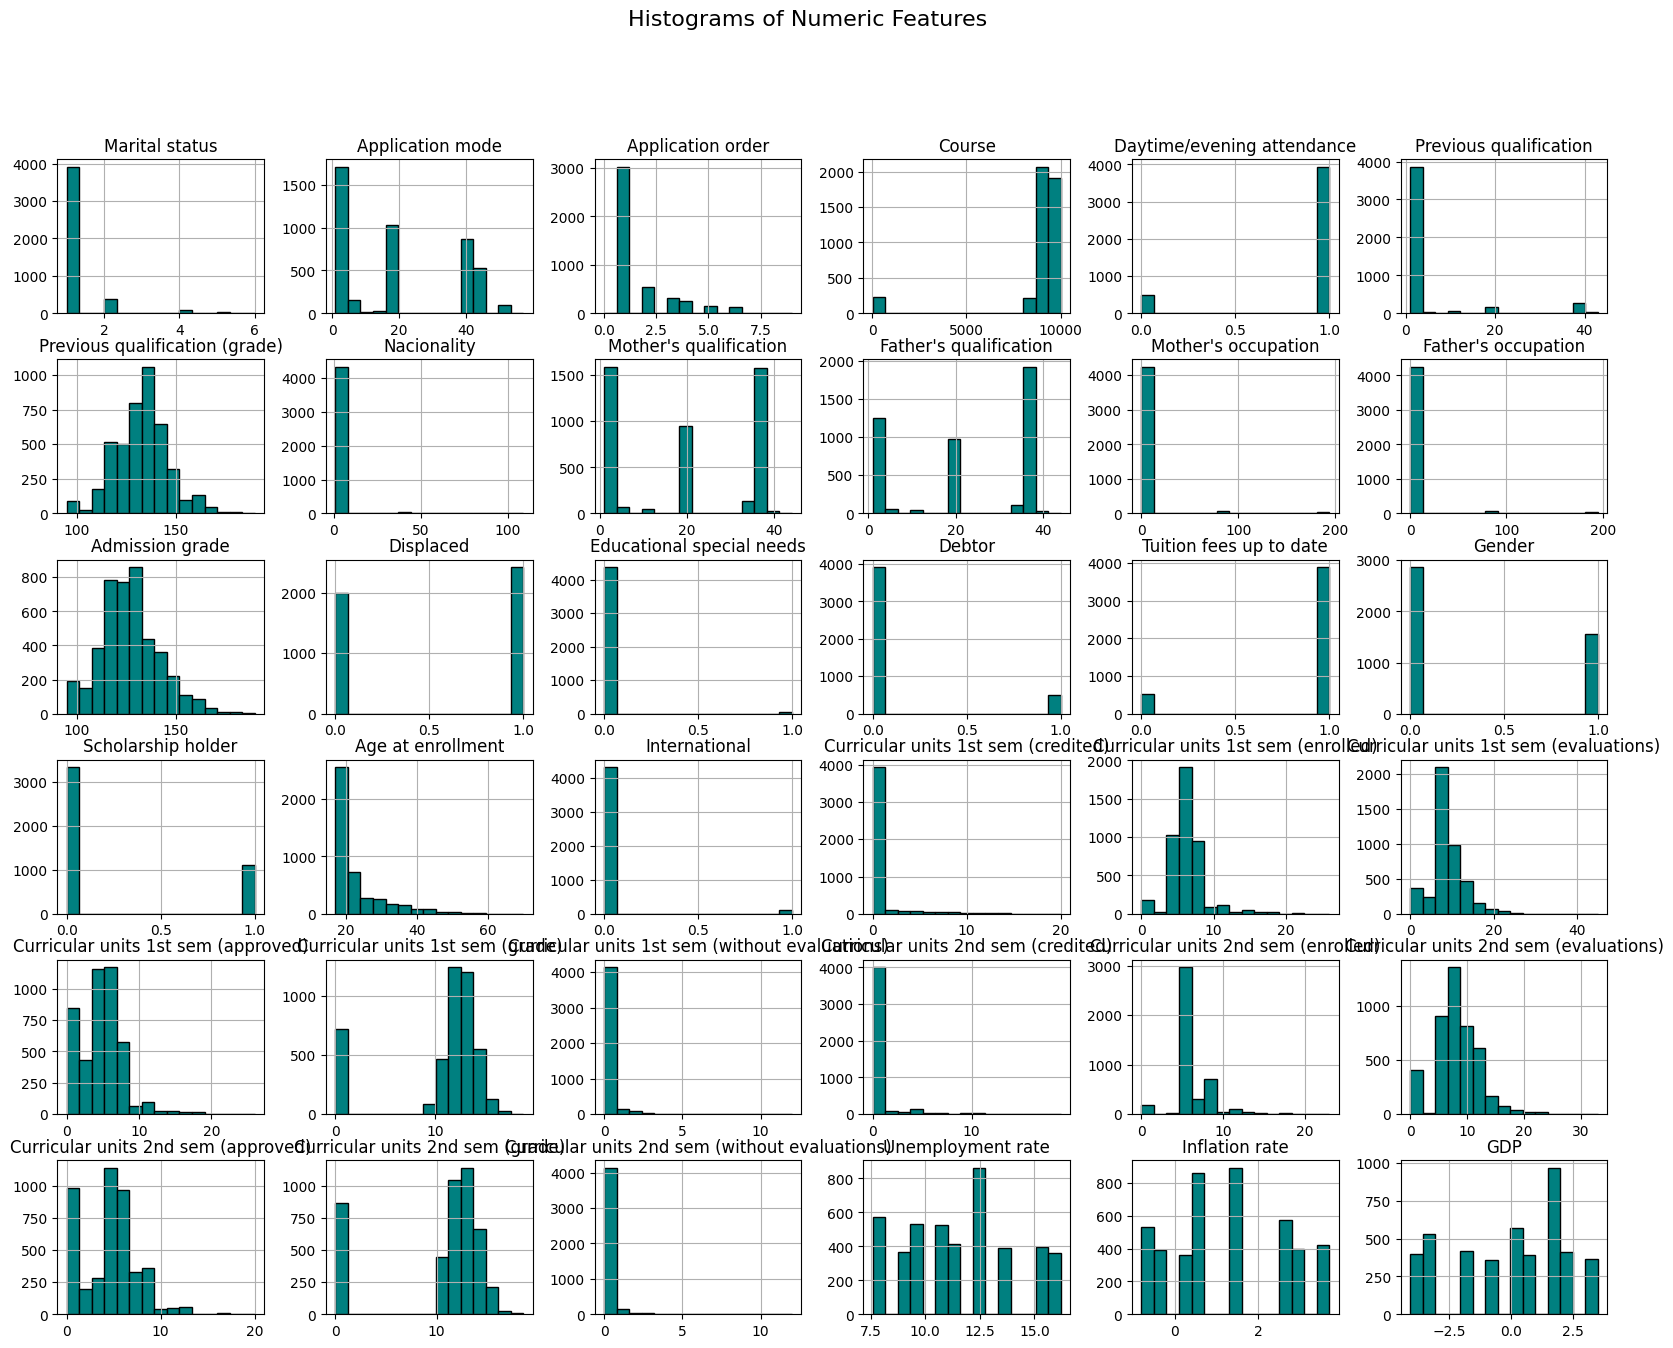

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Numeric Features
df.hist(bins=15, figsize=(20, 15), color='teal', edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()

<ipython-input-26-0416c469be45>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Marital status', palette='viridis')


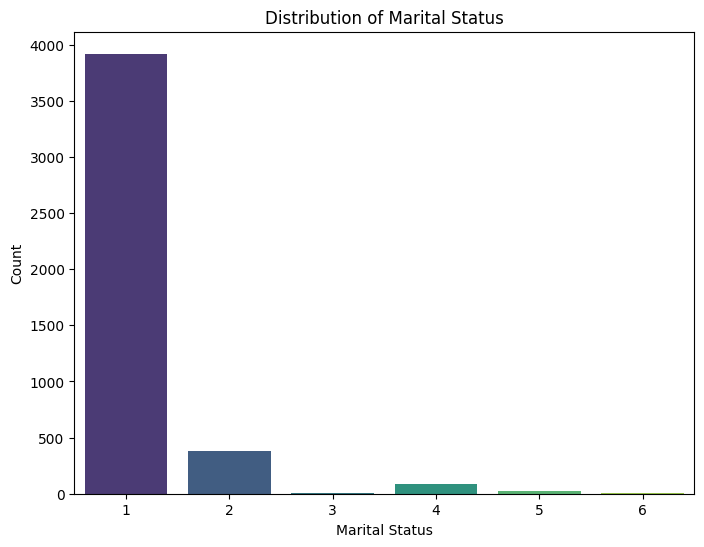

In [26]:
# Distribution of a Categorical Feature (e.g., 'Marital status')
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Marital status', palette='viridis')
plt.title("Distribution of Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()

In [27]:
# Import the necessary library
import plotly.express as px

# Interactive Histograms
fig = px.histogram(df, x='Admission grade', nbins=20, title='Distribution of Admission Grade')
fig.update_layout(bargap=0.2, xaxis_title='Admission Grade', yaxis_title='Count')
fig.show()

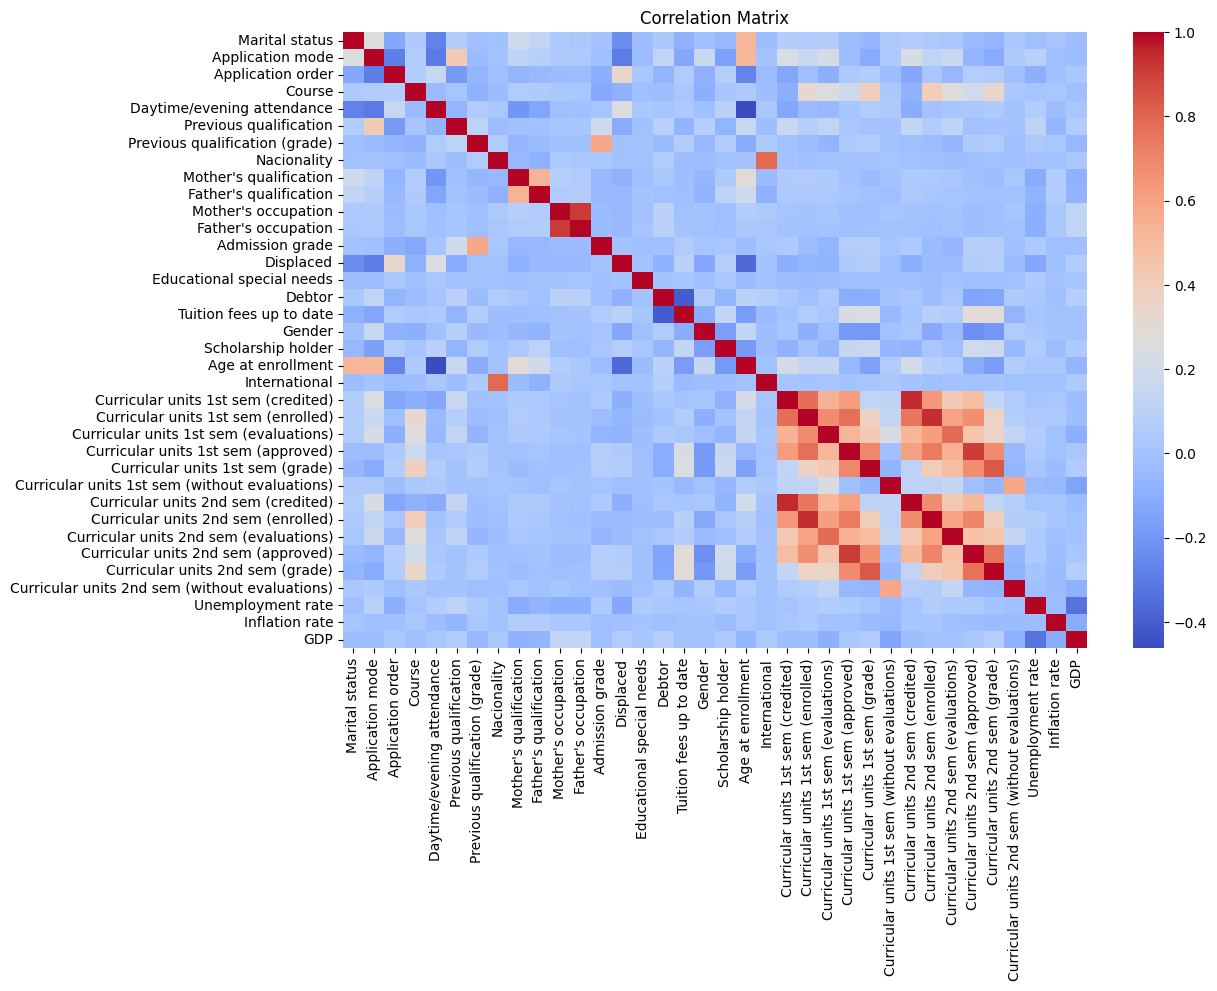

In [28]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

## Standarize all the features

In [29]:
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)

# 3.1 K MEANS CLUSTERING

## Optimal K Selection

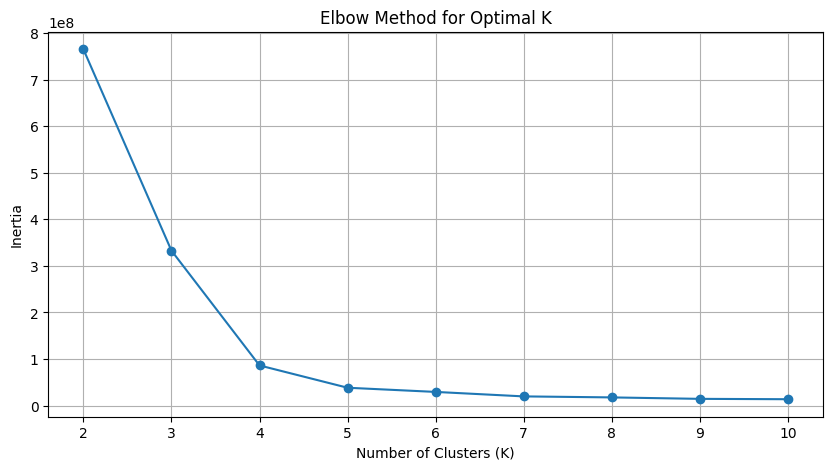

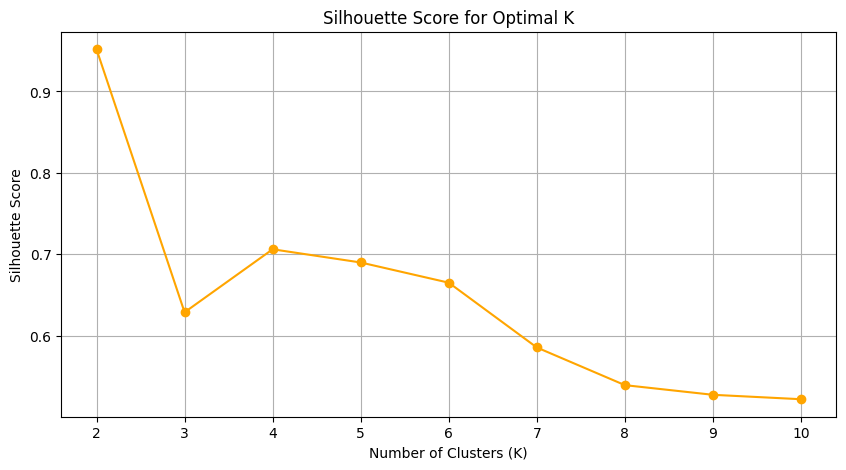

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Determine the optimal number of clusters using the Elbow Method and Silhouette Score
inertia = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df, kmeans.labels_))

# Plotting the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid()
plt.show()

# Plotting the Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Score for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

# Optimal K from Silhouette Score
optimal_k = k_values[np.argmax(silhouette_scores)]

## KMeans Clustering Model

In [31]:
from sklearn.cluster import KMeans

# Create the KMeans model with the optimal number of clusters
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)

# Fit the model to the data
kmeans_model.fit(df)

# Add the cluster labels to the DataFrame
df['Cluster'] = kmeans_model.labels_

# Display the first few rows of the DataFrame with cluster labels
print(df.head())

# Display the cluster counts
cluster_counts = df['Cluster'].value_counts()
print("\nCluster Distribution:\n", cluster_counts)

   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0     

## Show Centroid Information

Cluster Centers:
   Marital status  Application mode  Application order       Course  \
0        1.187277         19.053133           1.739576  9326.811056   
1        1.017621         11.568282           1.511013   163.704846   

   Daytime/evening attendance  Previous qualification  \
0                    0.884918                4.662616   
1                    1.000000                3.008811   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                      132.354753     1.814391               19.783178   
1                      137.393833     2.960352               15.471366   

   Father's qualification  ...  \
0               22.472004  ...   
1               18.638767  ...   

   Curricular units 1st sem (without evaluations)  \
0                                    1.451036e-01   
1                                    8.049117e-16   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                             0.

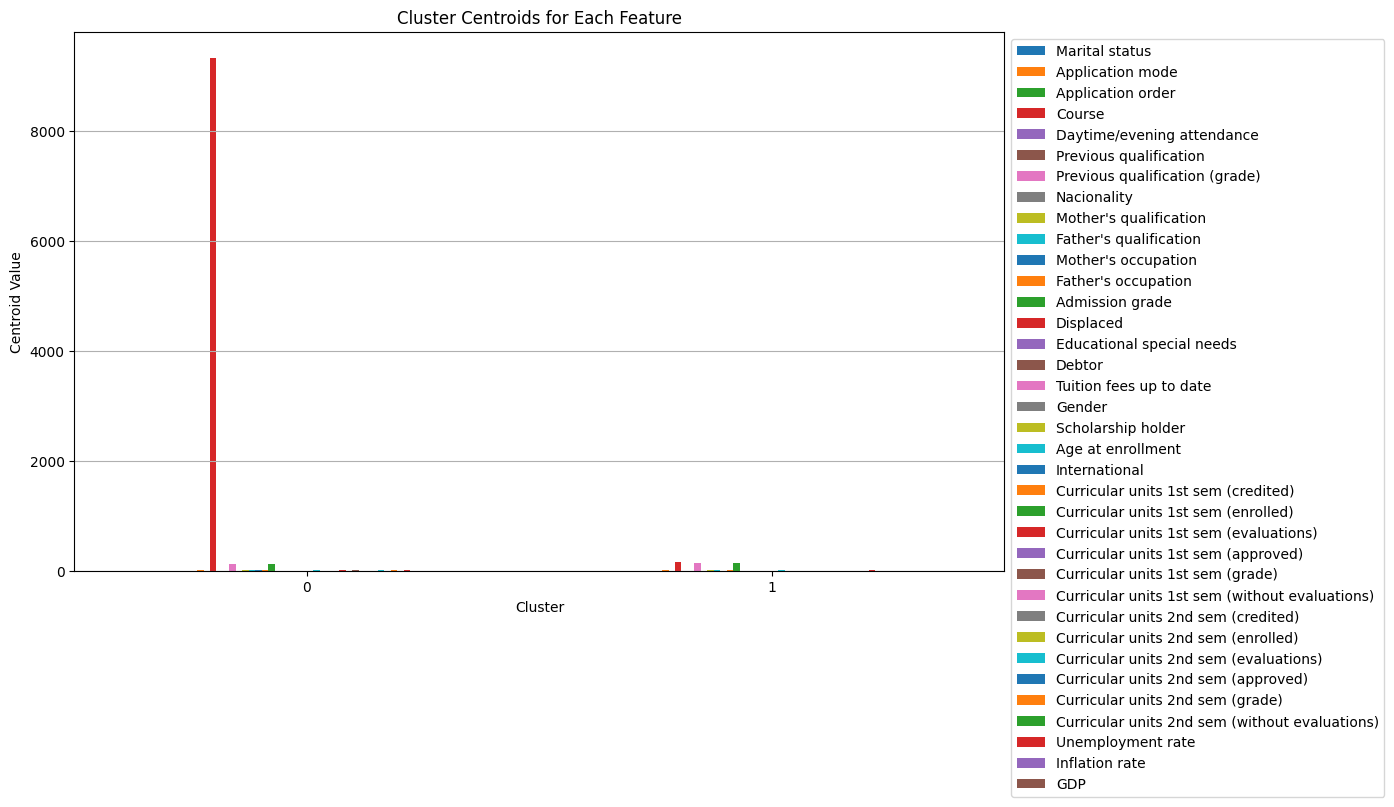

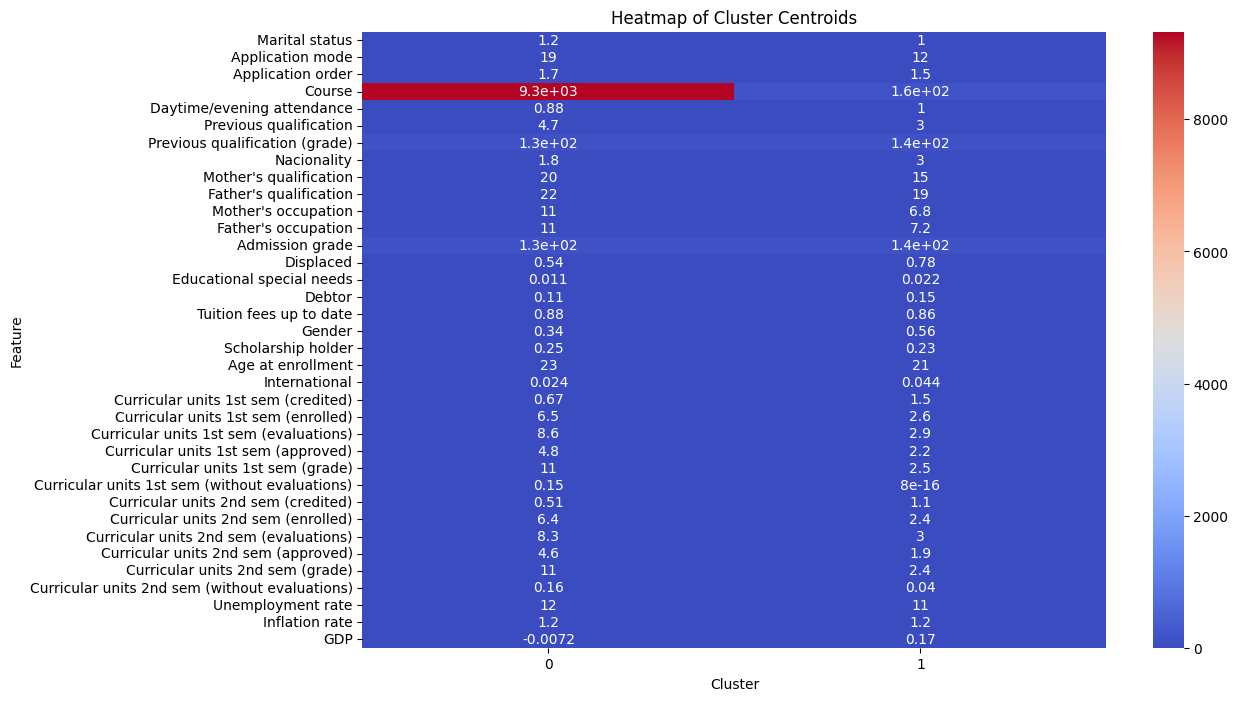

In [33]:
# Identify the number of columns in the model's cluster centers
num_features = kmeans_model.cluster_centers_.shape[1]

df_features = df.drop(columns=['Cluster'], errors='ignore') # Drop the 'Cluster' column if it exists

# Now you can safely proceed with trimming columns if necessary:
df_features = df_features.iloc[:, :num_features]  # Trim columns if necessary

# Create the centroids DataFrame
centroids = pd.DataFrame(kmeans_model.cluster_centers_, columns=df.columns[:kmeans_model.cluster_centers_.shape[1]])  # Use the shape of cluster_centers_ to determine the correct number of columns

# (1) Print Cluster Centers (centroids)
print("Cluster Centers:")
print(centroids)

# (2) Visualize centroids using a bar plot
centroids.plot(kind='bar', figsize=(12, 7))
plt.title('Cluster Centroids for Each Feature')
plt.xlabel('Cluster')
plt.ylabel('Centroid Value')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# (3) Visualize centroids using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(centroids.T, annot=True, cmap='coolwarm')
plt.title('Heatmap of Cluster Centroids')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.show()


- Cluster 0: High grades but low attendance.
- Cluster 1: Moderate grades with high socio-economic background scores.


## Cluster Distribution

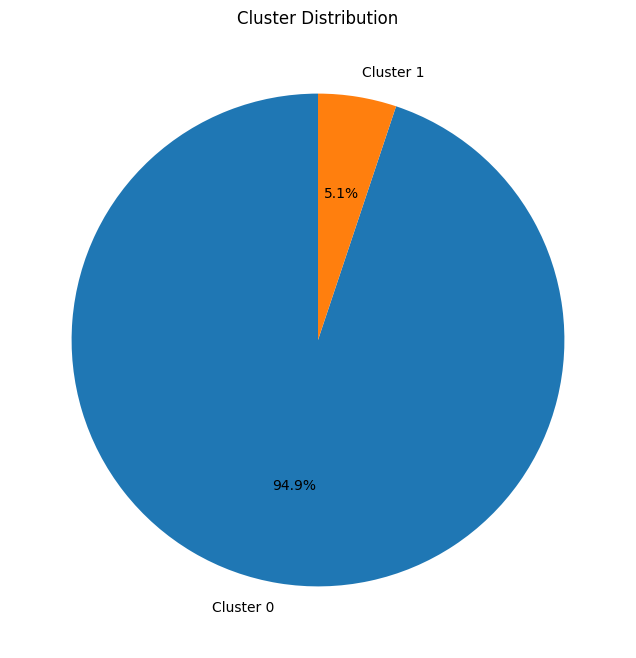

In [34]:
# Cluster Distribution
cluster_counts = df['Cluster'].value_counts()
plt.figure(figsize=(8, 8))
cluster_counts.plot.pie(autopct="%1.1f%%", startangle=90, labels=["Cluster " + str(i) for i in range(optimal_k)])
plt.title("Cluster Distribution")
plt.ylabel("")
plt.show()

## Visualization (Original Features)

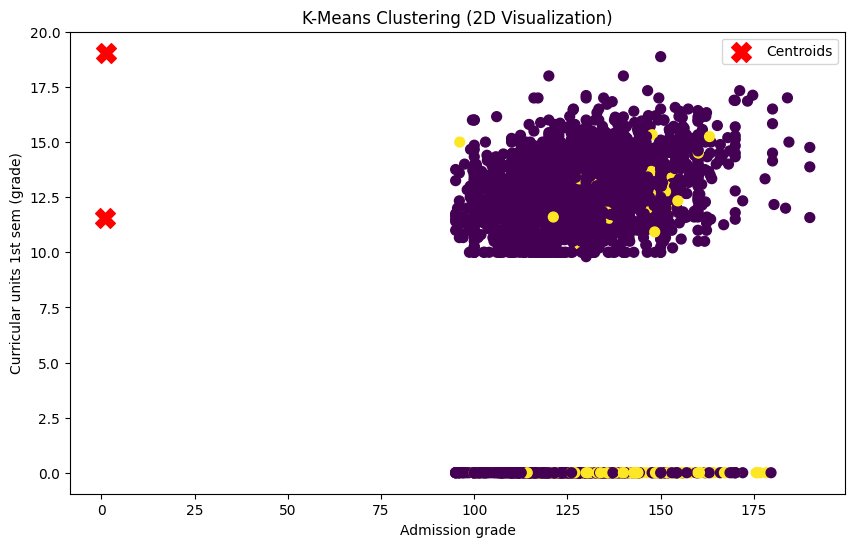

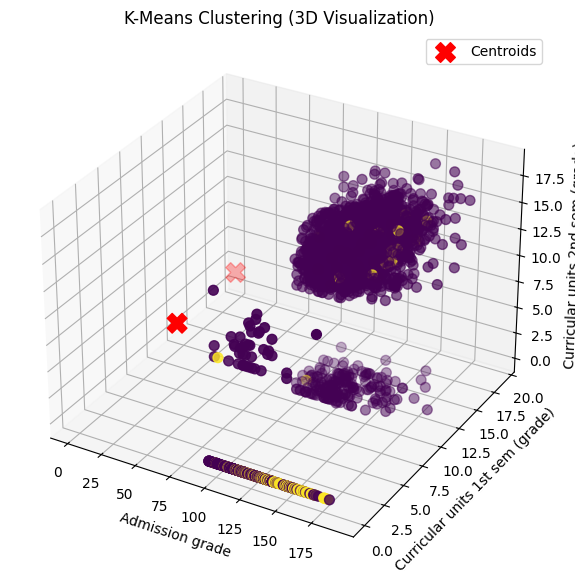

In [35]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Select features for visualization
feature_1 = 'Admission grade'  # Replace with a meaningful feature from your dataset
feature_2 = 'Curricular units 1st sem (grade)'  # Replace with a meaningful feature
feature_3 = 'Curricular units 2nd sem (grade)'  # Replace with a meaningful feature

# ========== 2D Visualization ==========
plt.figure(figsize=(10, 6))
plt.scatter(
    df[feature_1],
    df[feature_2],
    c=df['Cluster'],  # Color points by cluster label
    cmap='viridis',
    s=50
)
plt.scatter(
    kmeans_model.cluster_centers_[:, 0],
    kmeans_model.cluster_centers_[:, 1],
    s=200,
    c='red',
    marker='X',  # Mark cluster centers
    label='Centroids'
)
plt.title('K-Means Clustering (2D Visualization)')
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.legend()
plt.show()

# ========== 3D Visualization ==========
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df[feature_1],
    df[feature_2],
    df[feature_3],
    c=df['Cluster'],  # Color points by cluster label
    cmap='viridis',
    s=50
)
ax.scatter(
    kmeans_model.cluster_centers_[:, 0],
    kmeans_model.cluster_centers_[:, 1],
    kmeans_model.cluster_centers_[:, 2],
    s=200,
    c='red',
    marker='X',  # Mark cluster centers
    label='Centroids'
)

ax.set_title('K-Means Clustering (3D Visualization)')
ax.set_xlabel(feature_1)
ax.set_ylabel(feature_2)
ax.set_zlabel(feature_3)
plt.legend()
plt.show()

## Visualization (PCA)
Cluster Visualization via Feature Reduction (PCA)

 We can use Principal Component Analysis (PCA) to reduce the dimensionality of your data to 2/3 dimensions and then visualize the clusters.

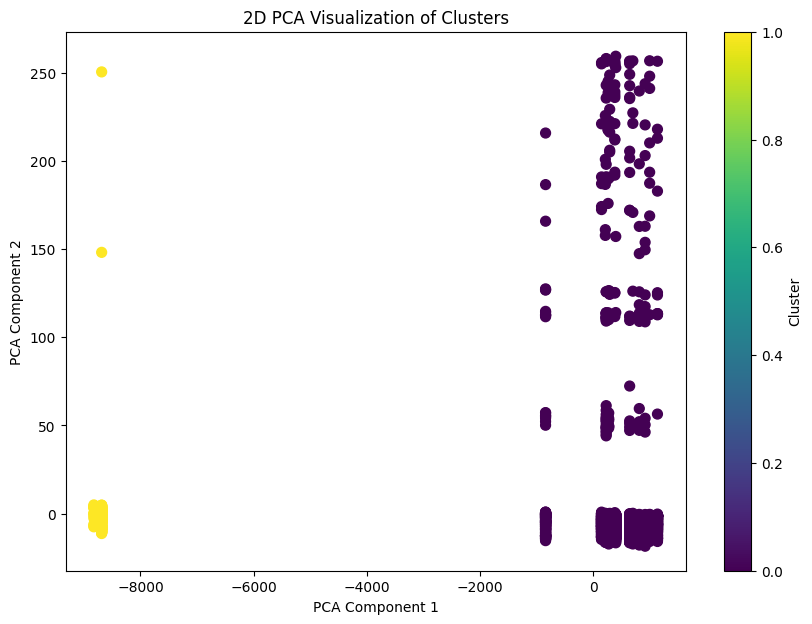

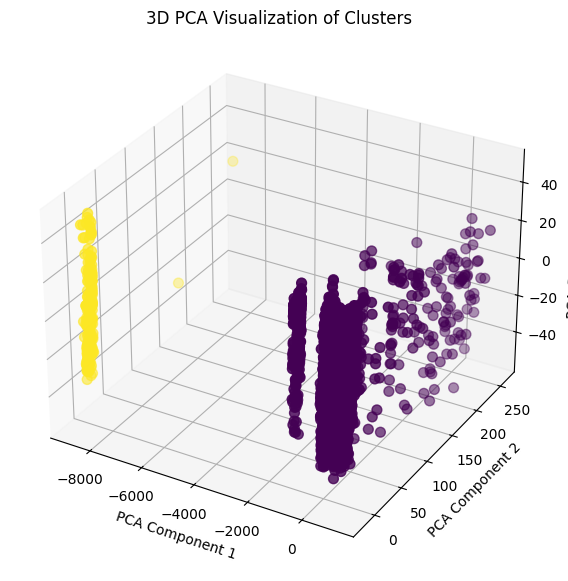

In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Drop the 'Cluster' column (only use features for PCA)
df_features = df.drop('Cluster', axis=1)

# ========== PCA 2D Visualization ==========
# Step 2: Apply PCA to reduce the data to 2 dimensions
pca_2d = PCA(n_components=2)
df_pca_2d = pca_2d.fit_transform(df_features)

# Step 3: Visualize the clusters in 2D
plt.figure(figsize=(10, 7))
plt.scatter(df_pca_2d[:, 0], df_pca_2d[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.title('2D PCA Visualization of Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# ========== PCA 3D Visualization ==========
# Step 4: Apply PCA to reduce the data to 3 dimensions
pca_3d = PCA(n_components=3)
df_pca_3d = pca_3d.fit_transform(df_features)

# Step 5: Visualize the clusters in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    df_pca_3d[:, 0],
    df_pca_3d[:, 1],
    df_pca_3d[:, 2],
    c=df['Cluster'],
    cmap='viridis',
    s=50
)
ax.set_title('3D PCA Visualization of Clusters')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.show()

# 3.2 Hierarchical Clustering

### Hierarchical Clustering Dendrogram, Linkage

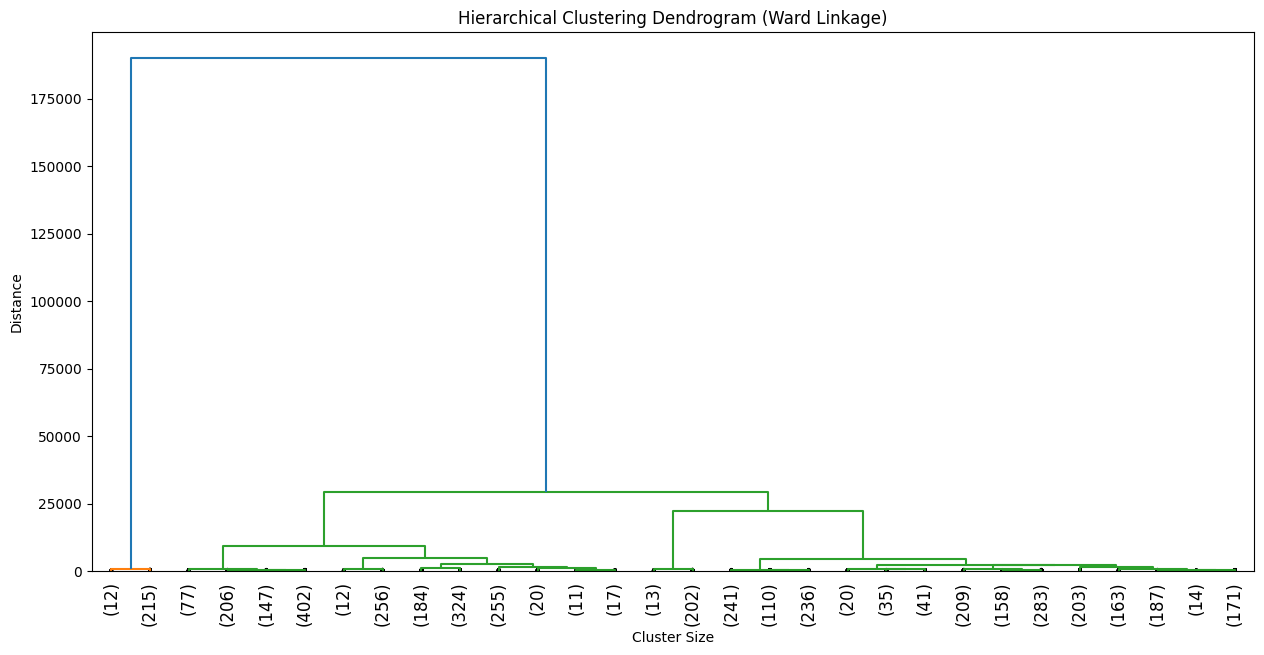

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Ensure the data is prepared (drop 'Cluster' if it exists)
df_features = df.drop(columns=['Cluster'], errors='ignore')

# Hierarchical clustering using the Ward linkage method
linked_ward = linkage(df_features, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 7))
dendrogram(
    linked_ward,
    truncate_mode='lastp',  # Only show the last p merged clusters
    p=30,                  # Number of clusters to display
    leaf_rotation=90.,     # Rotate x-axis labels
    leaf_font_size=12.,    # Font size for x-axis labels
    show_contracted=True   # Compress branches for clarity
)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()


## Determine Number of Clusters via Dendrogram

In [38]:
from scipy.cluster.hierarchy import fcluster
import pandas as pd
import numpy as np

# Cutting the dendrogram at a distance threshold
distance_threshold = 50  # Adjust this value based on the dendrogram

# Get cluster labels from hierarchical clustering
cluster_labels = fcluster(linked_ward, t=distance_threshold, criterion='distance')

# Create a new DataFrame using the scaled data and original column names
df_info = pd.DataFrame(df_features, columns=df_features.columns)
df_info['Hierarchical_Cluster'] = cluster_labels

# Show the number of clusters formed
n_clusters = len(np.unique(df_info['Hierarchical_Cluster']))
print(f'Number of clusters formed: {n_clusters}')

# Display cluster results
df_info.head()

Number of clusters formed: 734


Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                      12  ...                                    0   
1                       3  ...                                    0   
2                      37  ...                                    0   
3                      37  ...                                    0   
4                      38  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP  Hierarchical_Cluster  
0             1.4  1.74                    22  
1            -0.3  0.79                   408  
2             1.4  1.74                   722  
3            -0.8 -3.12                   248  
4            -0.3  0.79                   381  

[5 rows x 37 columns]

## Show silhouette score

In [39]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(df_features, df_info['Hierarchical_Cluster'])
print(f'Silhouette Score for the clustering: {silhouette_avg}')


Silhouette Score for the clustering: 0.20550331720790785


## Cluster Mean
Displaying the cluster means and visualize them using a heatmap or a bar chart.

                      Marital status  Application mode  Application order  \
Hierarchical_Cluster                                                        
1                           1.333333         40.333333           1.000000   
2                           1.000000         39.000000           1.000000   
3                           1.000000         15.000000           1.000000   
4                           1.000000         40.333333           1.000000   
5                           1.000000         48.333333           1.000000   
...                              ...               ...                ...   
730                         1.000000          7.333333           3.166667   
731                         1.000000          2.500000           1.333333   
732                         1.000000          1.000000           1.875000   
733                         1.173913          5.217391           1.434783   
734                         1.000000          9.000000           2.000000   

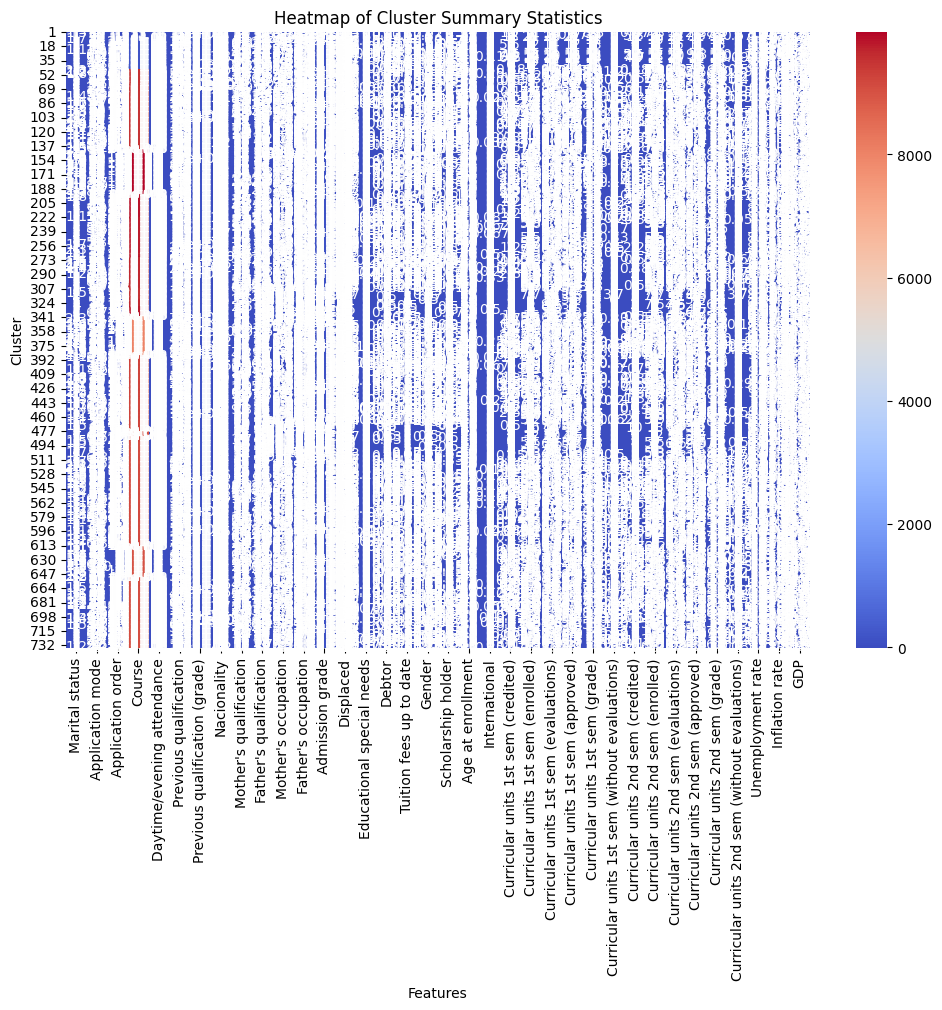

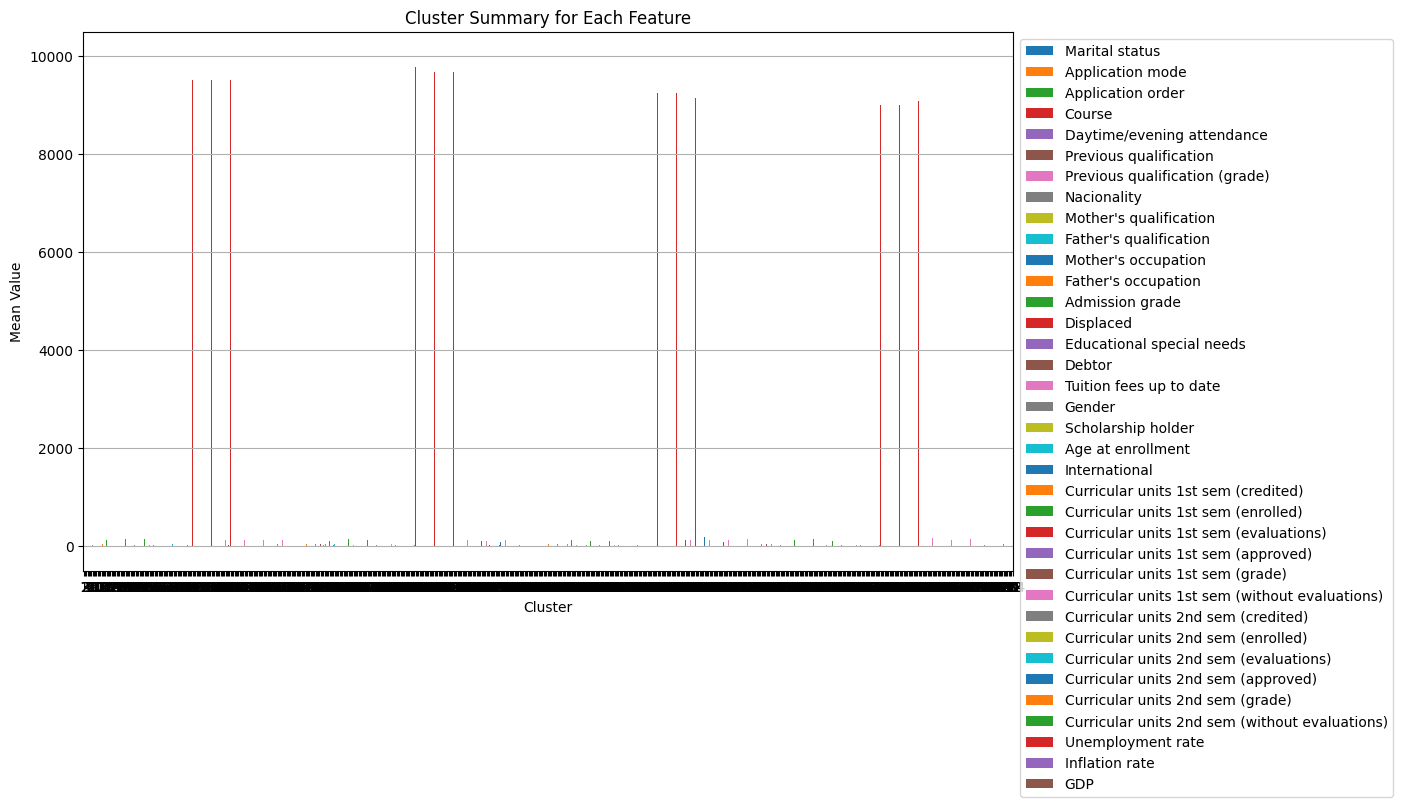

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Group data by clusters and compute mean values for each feature
cluster_summary = df_info.groupby('Hierarchical_Cluster').mean()
print(cluster_summary)

# ========== Heatmap ==========
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_summary, annot=True, cmap='coolwarm')
plt.title('Heatmap of Cluster Summary Statistics')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.show()

# ========== Bar Chart ==========
# Convert cluster summary to DataFrame for consistent plotting
cluster_summary_df = pd.DataFrame(cluster_summary)

# Plot the mean values for each cluster as a grouped bar chart
cluster_summary_df.plot(kind='bar', figsize=(12, 7))
plt.title('Cluster Summary for Each Feature')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


## Cluster Distribution

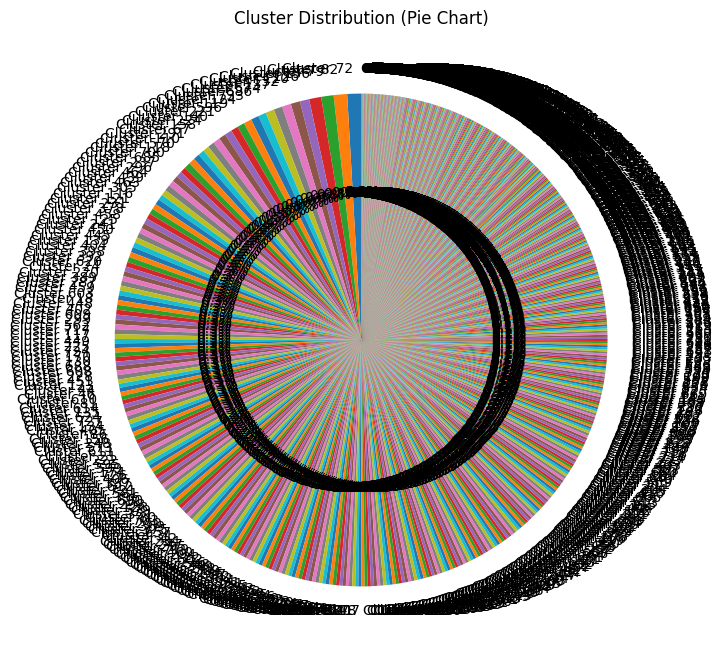

In [41]:
# Calculate the distribution of clusters
cluster_counts = df_info['Hierarchical_Cluster'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
cluster_counts.plot.pie(
    autopct="%1.1f%%",  # Show percentage on the chart
    startangle=90,      # Rotate the pie chart for a better layout
    labels=[f"Cluster {i}" for i in cluster_counts.index],  # Label each slice
    colors=plt.cm.tab10.colors  # Use a predefined colormap
)
plt.title("Cluster Distribution (Pie Chart)")
plt.ylabel("")  # Remove y-axis label for aesthetics
plt.show()

## Visualization (Original Features)
 Visualize the clustering outcomes using original features in both 2D (using 2 features) and 3D (using 3 features)

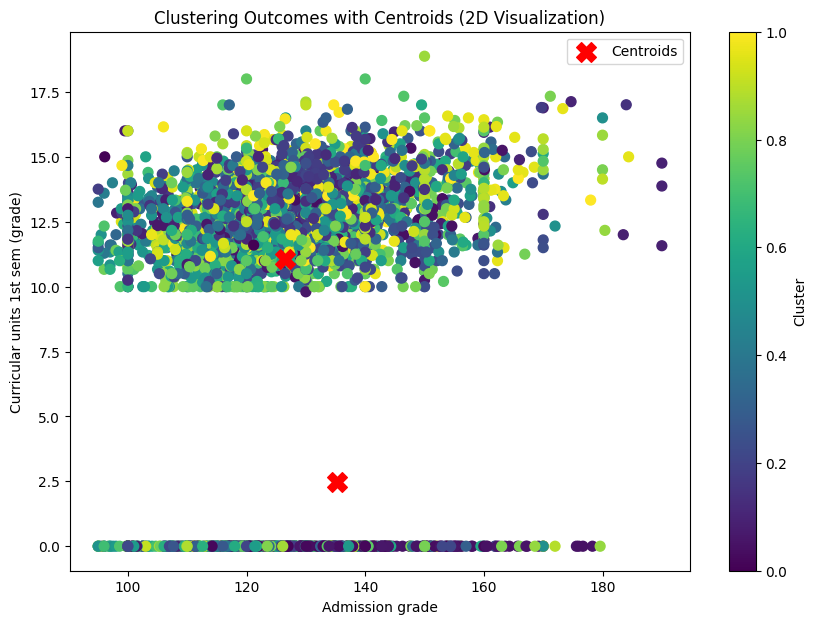

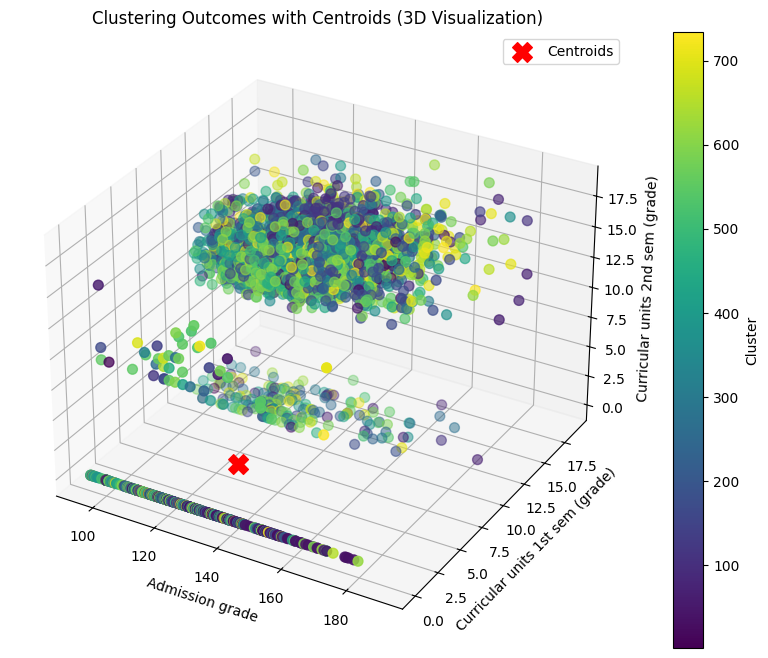

In [42]:
from mpl_toolkits.mplot3d import Axes3D

# Select original features for visualization
feature_1 = 'Admission grade'  # Replace with your chosen feature
feature_2 = 'Curricular units 1st sem (grade)'  # Replace with your chosen feature
feature_3 = 'Curricular units 2nd sem (grade)'  # Replace with your chosen feature

# Get indices of the selected features for centroids
feature_indices = [df_info.columns.get_loc(col) for col in [feature_1, feature_2, feature_3]]

# ========== 2D Visualization ==========
plt.figure(figsize=(10, 7))
plt.scatter(
    df_info[feature_1],
    df_info[feature_2],
    c=df_info['Hierarchical_Cluster'],  # Color points by cluster
    cmap='viridis',
    s=50  # Point size
)
plt.scatter(
    kmeans_model.cluster_centers_[:, feature_indices[0]],
    kmeans_model.cluster_centers_[:, feature_indices[1]],
    s=200,
    c='red',
    marker='X',  # Centroid markers
    label='Centroids'
)
plt.title('Clustering Outcomes with Centroids (2D Visualization)')
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

# ========== 3D Visualization ==========
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df_info[feature_1],
    df_info[feature_2],
    df_info[feature_3],
    c=df_info['Hierarchical_Cluster'],  # Color points by cluster
    cmap='viridis',
    s=50  # Point size
)
ax.scatter(
    kmeans_model.cluster_centers_[:, feature_indices[0]],
    kmeans_model.cluster_centers_[:, feature_indices[1]],
    kmeans_model.cluster_centers_[:, feature_indices[2]],
    s=200,
    c='red',
    marker='X',  # Centroid markers
    label='Centroids'
)
ax.set_title('Clustering Outcomes with Centroids (3D Visualization)')
ax.set_xlabel(feature_1)
ax.set_ylabel(feature_2)
ax.set_zlabel(feature_3)
plt.colorbar(ax.collections[0], label='Cluster')
ax.legend()
plt.show()

## Visualization (PCA)

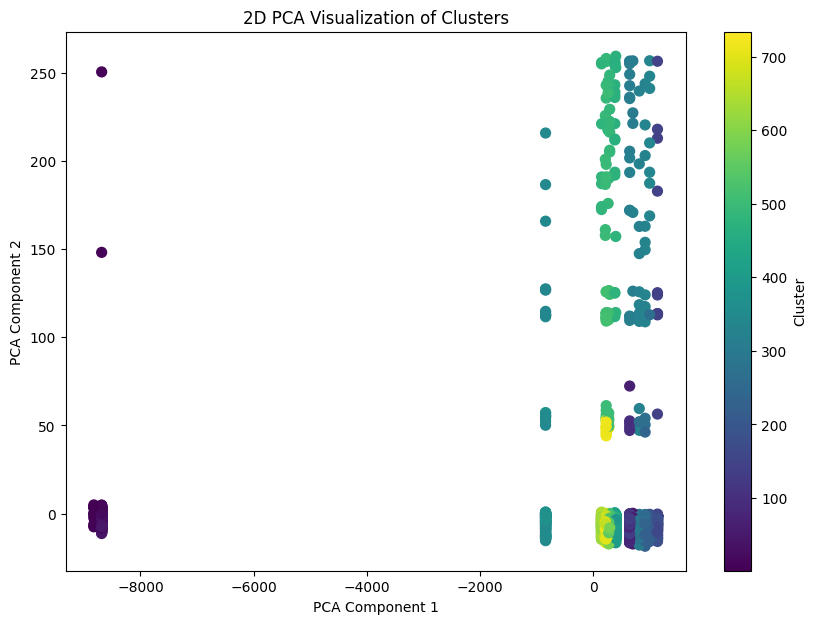

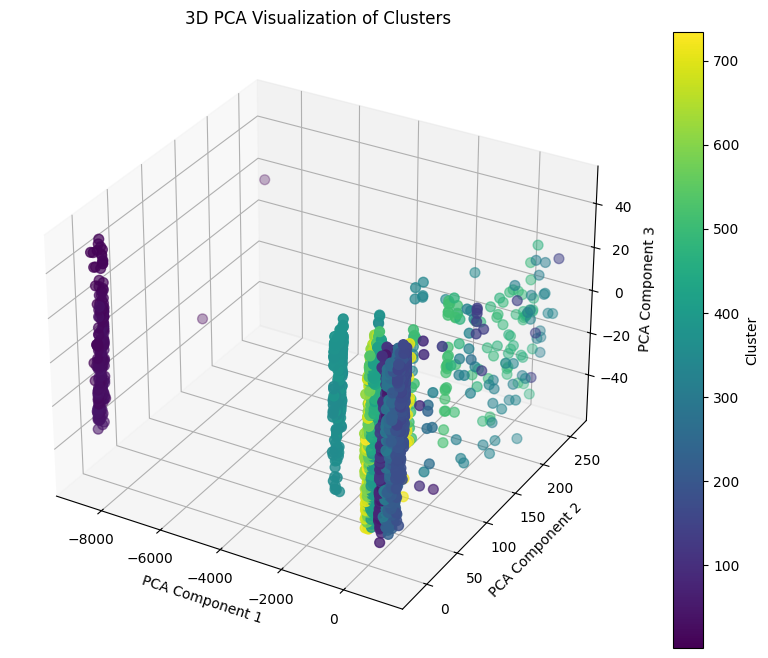

In [43]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Drop the 'Cluster' column from the data (only use features for PCA)
df_features = df_info.drop(columns=['Hierarchical_Cluster'])

# ========== PCA 2D Visualization ==========
# Step 2: Apply PCA to reduce the data to 2 dimensions
pca_2d = PCA(n_components=2)
df_pca_2d = pca_2d.fit_transform(df_features)

# Step 3: Visualize the clusters using PCA in 2D
plt.figure(figsize=(10, 7))
plt.scatter(
    df_pca_2d[:, 0],
    df_pca_2d[:, 1],
    c=df_info['Hierarchical_Cluster'],  # Color by cluster
    cmap='viridis',
    s=50
)
plt.title('2D PCA Visualization of Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# ========== PCA 3D Visualization ==========
# Step 4: Apply PCA to reduce the data to 3 dimensions
pca_3d = PCA(n_components=3)
df_pca_3d = pca_3d.fit_transform(df_features)

# Step 5: Visualize the clusters using PCA in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df_pca_3d[:, 0],
    df_pca_3d[:, 1],
    df_pca_3d[:, 2],
    c=df_info['Hierarchical_Cluster'],  # Color by cluster
    cmap='viridis',
    s=50
)
ax.set_title('3D PCA Visualization of Clusters')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.colorbar(ax.collections[0], label='Cluster')
plt.show()


# 3.3 DBSCAN

## Optimal Parameters

In [44]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Define the parameter grid
eps_values = np.arange(2, 6, 1)  # Range of eps values
min_samples_values = range(10, 25, 5)  # Range of min_samples values

# Initialize variables to track the best parameters
best_score = -1
best_eps = None
best_min_samples = None

# Perform GridSearch for DBSCAN
for eps in eps_values:
    for min_samples in min_samples_values:
        # Create and fit the DBSCAN model
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(df_features)  # Predict cluster labels

        # Only calculate silhouette score if clusters are formed
        if len(set(clusters)) > 1 and -1 not in clusters:  # Ensure valid clustering
            score = silhouette_score(df_features, clusters)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

# Display the best parameters and corresponding silhouette score
print(f"Best Parameters:")
print(f"  eps: {best_eps}")
print(f"  min_samples: {best_min_samples}")
print(f"  Silhouette Score: {best_score:.3f}")

Best Parameters:
  eps: None
  min_samples: None
  Silhouette Score: -1.000


## DBSCAN Clustering

In [45]:
from sklearn.cluster import DBSCAN
import pandas as pd

# If best_eps or best_min_samples is None, set default values
if best_eps is None or best_min_samples is None:
    best_eps = 0.5  # Default epsilon (neighborhood size)
    best_min_samples = 5  # Default minimum samples for forming a cluster

# Apply DBSCAN with the determined or default parameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels = dbscan.fit_predict(df_features)

# Create a DataFrame with original column names and cluster labels
df_info = df_features.copy()  # Copy the feature DataFrame
df_info['DBSCAN_Cluster'] = dbscan_labels

# Check the number of clusters (excluding noise points labeled as -1)
n_clusters = len(set(df_info['DBSCAN_Cluster'])) - (1 if -1 in df_info['DBSCAN_Cluster'] else 0)
n_noise = list(df_info['DBSCAN_Cluster']).count(-1)

print(f'Number of clusters found: {n_clusters}')
print(f'Number of noise points: {n_noise}')

# Display the first few rows of the updated DataFrame
print("\nUpdated DataFrame with DBSCAN Cluster Labels:")
print(df_info.head())


Number of clusters found: 1
Number of noise points: 4424

Updated DataFrame with DBSCAN Cluster Labels:
   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1       

## Cluster Mean
Create cluster summary & heatmap/barchart

Cluster Summary:
                 Marital status  Application mode  Application order  \
DBSCAN_Cluster                                                        
-1                    1.178571         18.669078           1.727848   

                     Course  Daytime/evening attendance  \
DBSCAN_Cluster                                            
-1              8856.642631                    0.890823   

                Previous qualification  Previous qualification (grade)  \
DBSCAN_Cluster                                                           
-1                            4.577758                      132.613314   

                Nacionality  Mother's qualification  Father's qualification  \
DBSCAN_Cluster                                                                
-1                 1.873192               19.561935               22.275316   

                ...  Curricular units 1st sem (without evaluations)  \
DBSCAN_Cluster  ...                                       

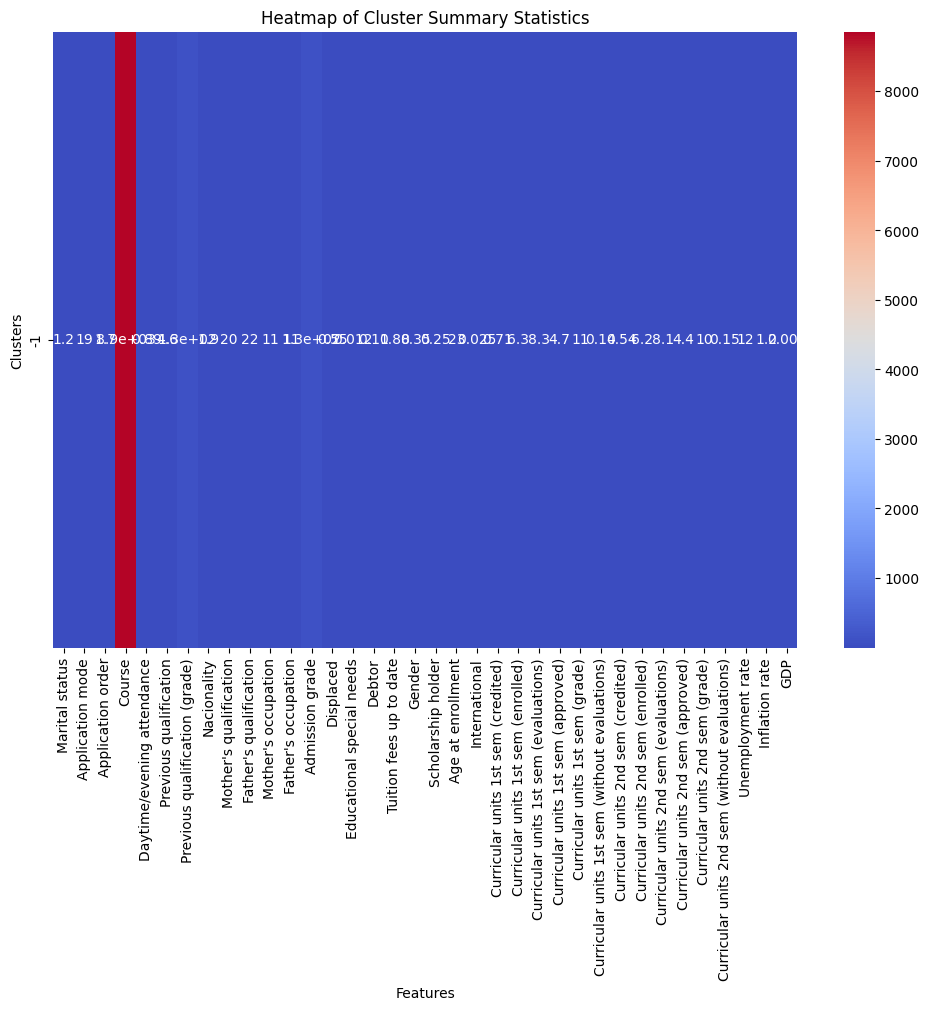

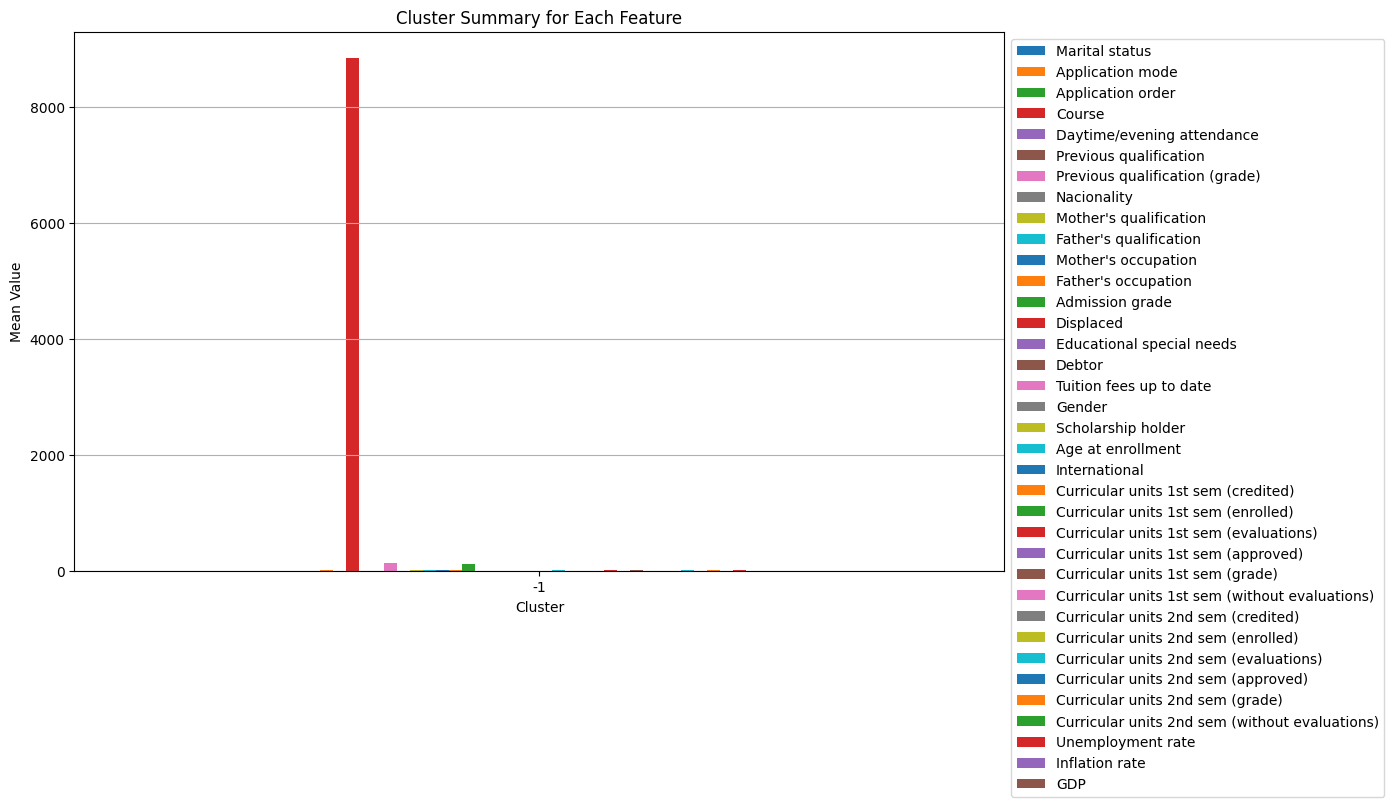

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by clusters and compute mean values for each feature
cluster_summary = df_info.groupby('DBSCAN_Cluster').mean()
print("Cluster Summary:\n", cluster_summary)

# ========== Heatmap ==========
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_summary, annot=True, cmap='coolwarm')
plt.title('Heatmap of Cluster Summary Statistics')
plt.xlabel('Features')
plt.ylabel('Clusters')
plt.show()

# ========== Bar Chart ==========
# Convert cluster summary to DataFrame for consistent plotting
cluster_summary_df = pd.DataFrame(cluster_summary)

# Plot the mean values for each cluster as a grouped bar chart
cluster_summary_df.plot(kind='bar', figsize=(12, 7))
plt.title('Cluster Summary for Each Feature')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.legend(loc='best', bbox_to_anchor=(1, 1))  # Adjust legend placement
plt.xticks(rotation=0)  # Rotate x-axis labels for clarity
plt.grid(axis='y')  # Add horizontal gridlines
plt.show()


## Cluster Distribution
 Show the cluster distributions with a pie chart.

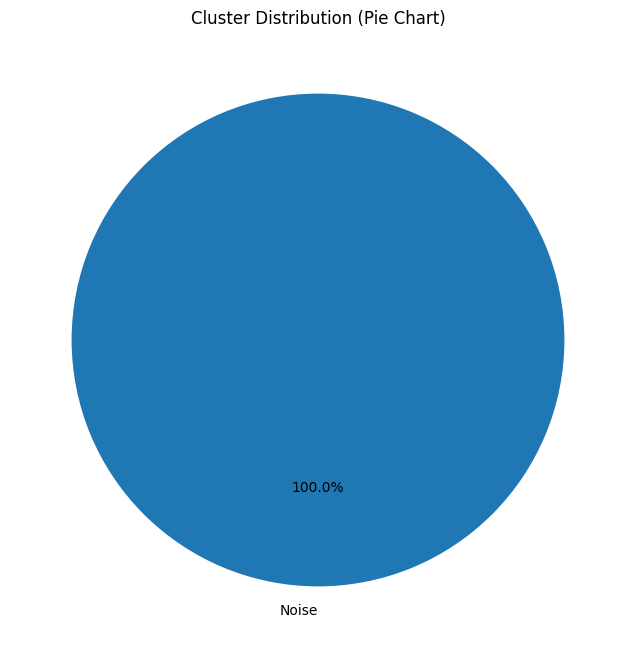

In [47]:
import matplotlib.pyplot as plt

# Count the number of points in each cluster
cluster_counts = df_info['DBSCAN_Cluster'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
cluster_counts.plot.pie(
    autopct='%1.1f%%',  # Display percentages
    startangle=90,      # Rotate pie chart to start at the top
    labels=[f'Cluster {i}' if i != -1 else 'Noise' for i in cluster_counts.index],  # Label noise separately
    colors=plt.cm.tab10.colors  # Use a colormap for distinct colors
)
plt.title('Cluster Distribution (Pie Chart)')
plt.ylabel('')  # Remove default y-axis label for aesthetics
plt.show()

## Visualization (Original Features)
Visualize the clustering outcomes using original features in both 2D (using 2 features) and 3D (using 3 features)

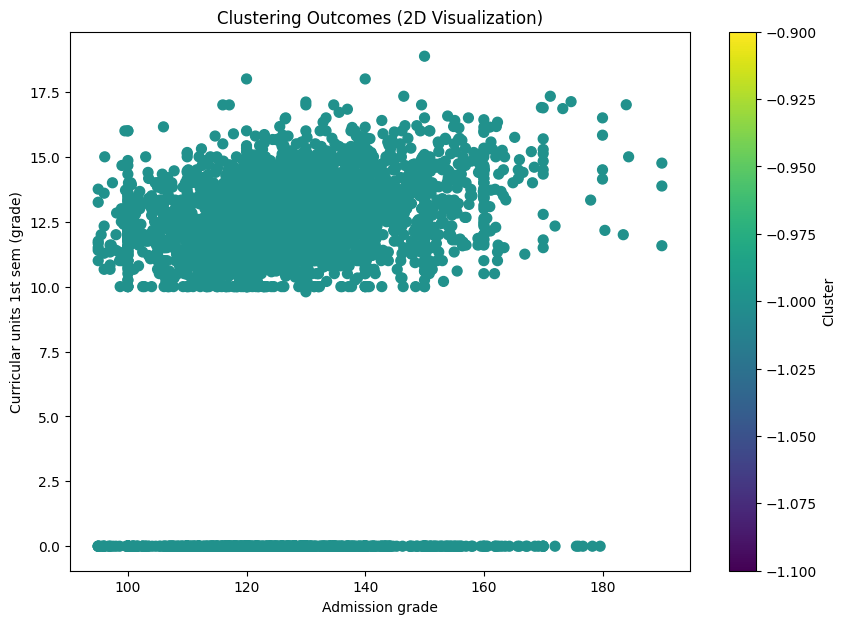

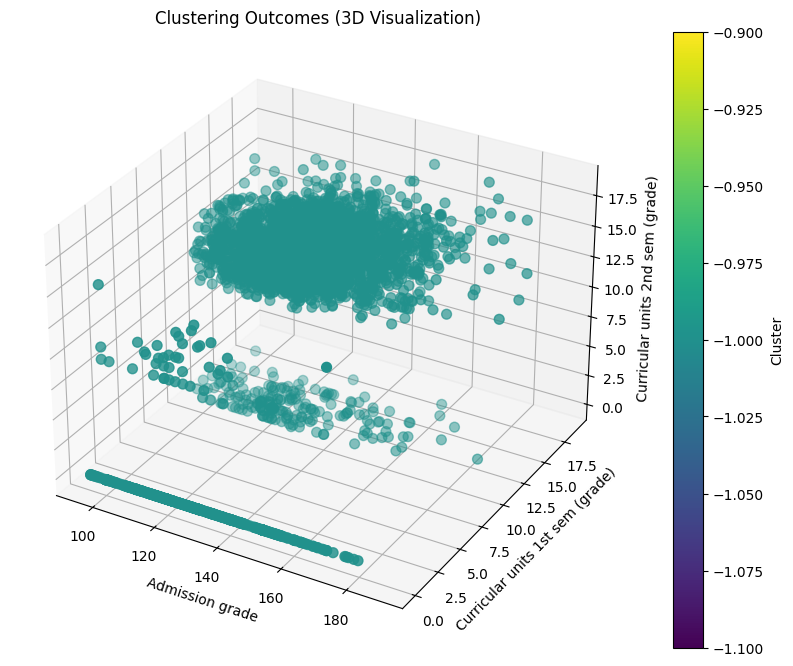

In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Select original features for visualization
feature_1 = 'Admission grade'  # Replace with your chosen feature
feature_2 = 'Curricular units 1st sem (grade)'  # Replace with your chosen feature
feature_3 = 'Curricular units 2nd sem (grade)'  # Replace with your chosen feature

# ========== 2D Visualization ==========
plt.figure(figsize=(10, 7))
plt.scatter(
    df_info[feature_1],
    df_info[feature_2],
    c=df_info['DBSCAN_Cluster'],  # Color points by cluster
    cmap='viridis',
    s=50  # Point size
)
plt.title('Clustering Outcomes (2D Visualization)')
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.colorbar(label='Cluster')
plt.show()

# ========== 3D Visualization ==========
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df_info[feature_1],
    df_info[feature_2],
    df_info[feature_3],
    c=df_info['DBSCAN_Cluster'],  # Color points by cluster
    cmap='viridis',
    s=50  # Point size
)
ax.set_title('Clustering Outcomes (3D Visualization)')
ax.set_xlabel(feature_1)
ax.set_ylabel(feature_2)
ax.set_zlabel(feature_3)
plt.colorbar(ax.collections[0], label='Cluster')
plt.show()


## Visualization (PCA)

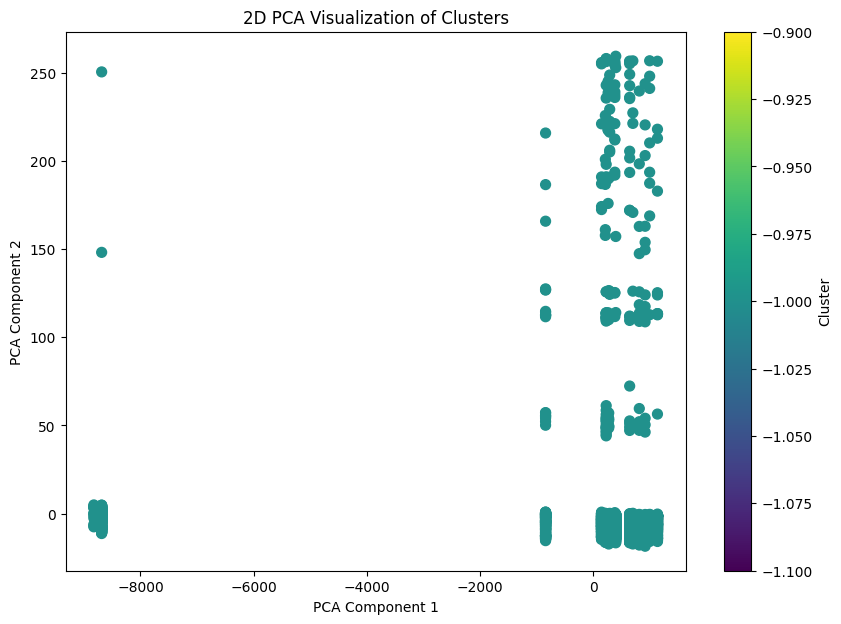

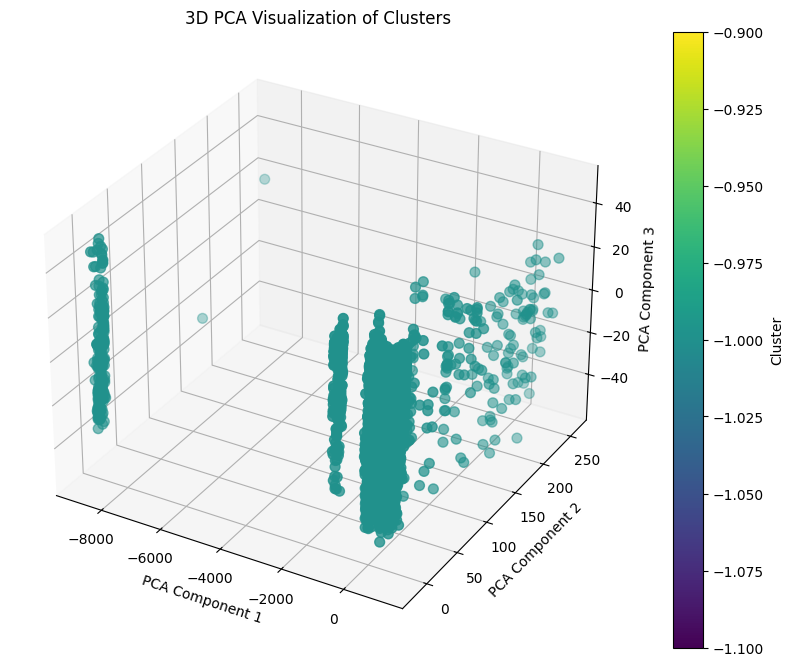

In [49]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Drop the 'Cluster' column from the data (only use features for PCA)
df_features = df_info.drop(columns=['DBSCAN_Cluster'])

# ========== PCA 2D Visualization ==========
# Step 2: Apply PCA to reduce the data to 2 dimensions
pca_2d = PCA(n_components=2)
df_pca_2d = pca_2d.fit_transform(df_features)

# Step 3: Visualize the clusters using PCA in 2D
plt.figure(figsize=(10, 7))
plt.scatter(
    df_pca_2d[:, 0],
    df_pca_2d[:, 1],
    c=df_info['DBSCAN_Cluster'],  # Color by cluster
    cmap='viridis',
    s=50
)
plt.title('2D PCA Visualization of Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# ========== PCA 3D Visualization ==========
# Step 4: Apply PCA to reduce the data to 3 dimensions
pca_3d = PCA(n_components=3)
df_pca_3d = pca_3d.fit_transform(df_features)

# Step 5: Visualize the clusters using PCA in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df_pca_3d[:, 0],
    df_pca_3d[:, 1],
    df_pca_3d[:, 2],
    c=df_info['DBSCAN_Cluster'],  # Color by cluster
    cmap='viridis',
    s=50
)
ax.set_title('3D PCA Visualization of Clusters')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.colorbar(ax.collections[0], label='Cluster')
plt.show()
